In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
anemia = pd.read_csv(r"C:\Users\user\Downloads\children anemia.csv\children anemia.csv")
anemia

,Age in 5-year groups,Residence,Literacy level,Wealth index,Births in last five years,Respondent age at 1st birth,Hb level altitude and smoking (g/dl - 1 decimal),Mosquito net,Smokes,Fever in last two weeks,Hb level altitude (g/dl - 1 decimal),Anemia level,Iron supplement
0,35-39,Urban,Secondary,Richest,2,32,121,Yes,No,No,102,Mild,Yes
1,25-29,Urban,Tertiary,Richest,1,24,116,Yes,No,No,109,Mild,No
2,20-24,Urban,Tertiary,Richest,2,19,118,Yes,No,No,96,Moderate,Yes
3,25-29,Urban,Secondary,Richest,2,22,95,Yes,No,No,96,Moderate,Yes
4,25-29,Urban,Secondary,Richer,1,23,109,Yes,No,No,96,Moderate,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4237,40-44,Rural,No education,Poorer,1,23,134,No,No,No,104,Mild,No
4238,20-24,Rural,Secondary,Richer,1,23,109,Yes,No,No,97,Moderate,No
4239,25-29,Rural,Tertiary,Richest,1,28,110,Yes,No,No,101,Mild,Yes
4240,35-39,Rural,Secondary,Richer,2,19,120,Yes,No,No,108,Mild,Yes


In [57]:
anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Age in 5-year groups                              4242 non-null   object
 1   Residence                                         4242 non-null   object
 2   Literacy level                                    4242 non-null   object
 3   Wealth index                                      4242 non-null   object
 4   Births in last five years                         4242 non-null   int64 
 5   Respondent age at 1st birth                       4242 non-null   int64 
 6   Hb level altitude and smoking (g/dl - 1 decimal)  4242 non-null   int64 
 7   Mosquito net                                      4242 non-null   object
 8   Smokes                                            4242 non-null   object
 9   Fever in last two weeks       

In [58]:
anemia["Anemia level"].value_counts()

#find out  categories existing in each column

Anemia level
Moderate    2404
Mild        1636
Severe       202
Name: count, dtype: int64

In [39]:
anemia.describe()

,Births in last five years,Respondent age at 1st birth,Hb level altitude and smoking (g/dl - 1 decimal),Hb level altitude (g/dl - 1 decimal)
count,4242.000000,4242.000000,4242.000000,4242.000000
mean,1.557049,19.743046,113.091702,93.498586
std,0.618944,4.333153,15.647958,12.355961
min,1.000000,12.000000,20.000000,29.000000
25%,1.000000,17.000000,104.000000,86.000000
50%,1.000000,19.000000,113.000000,96.000000
75%,2.000000,22.000000,124.000000,103.000000
max,4.000000,43.000000,166.000000,109.000000


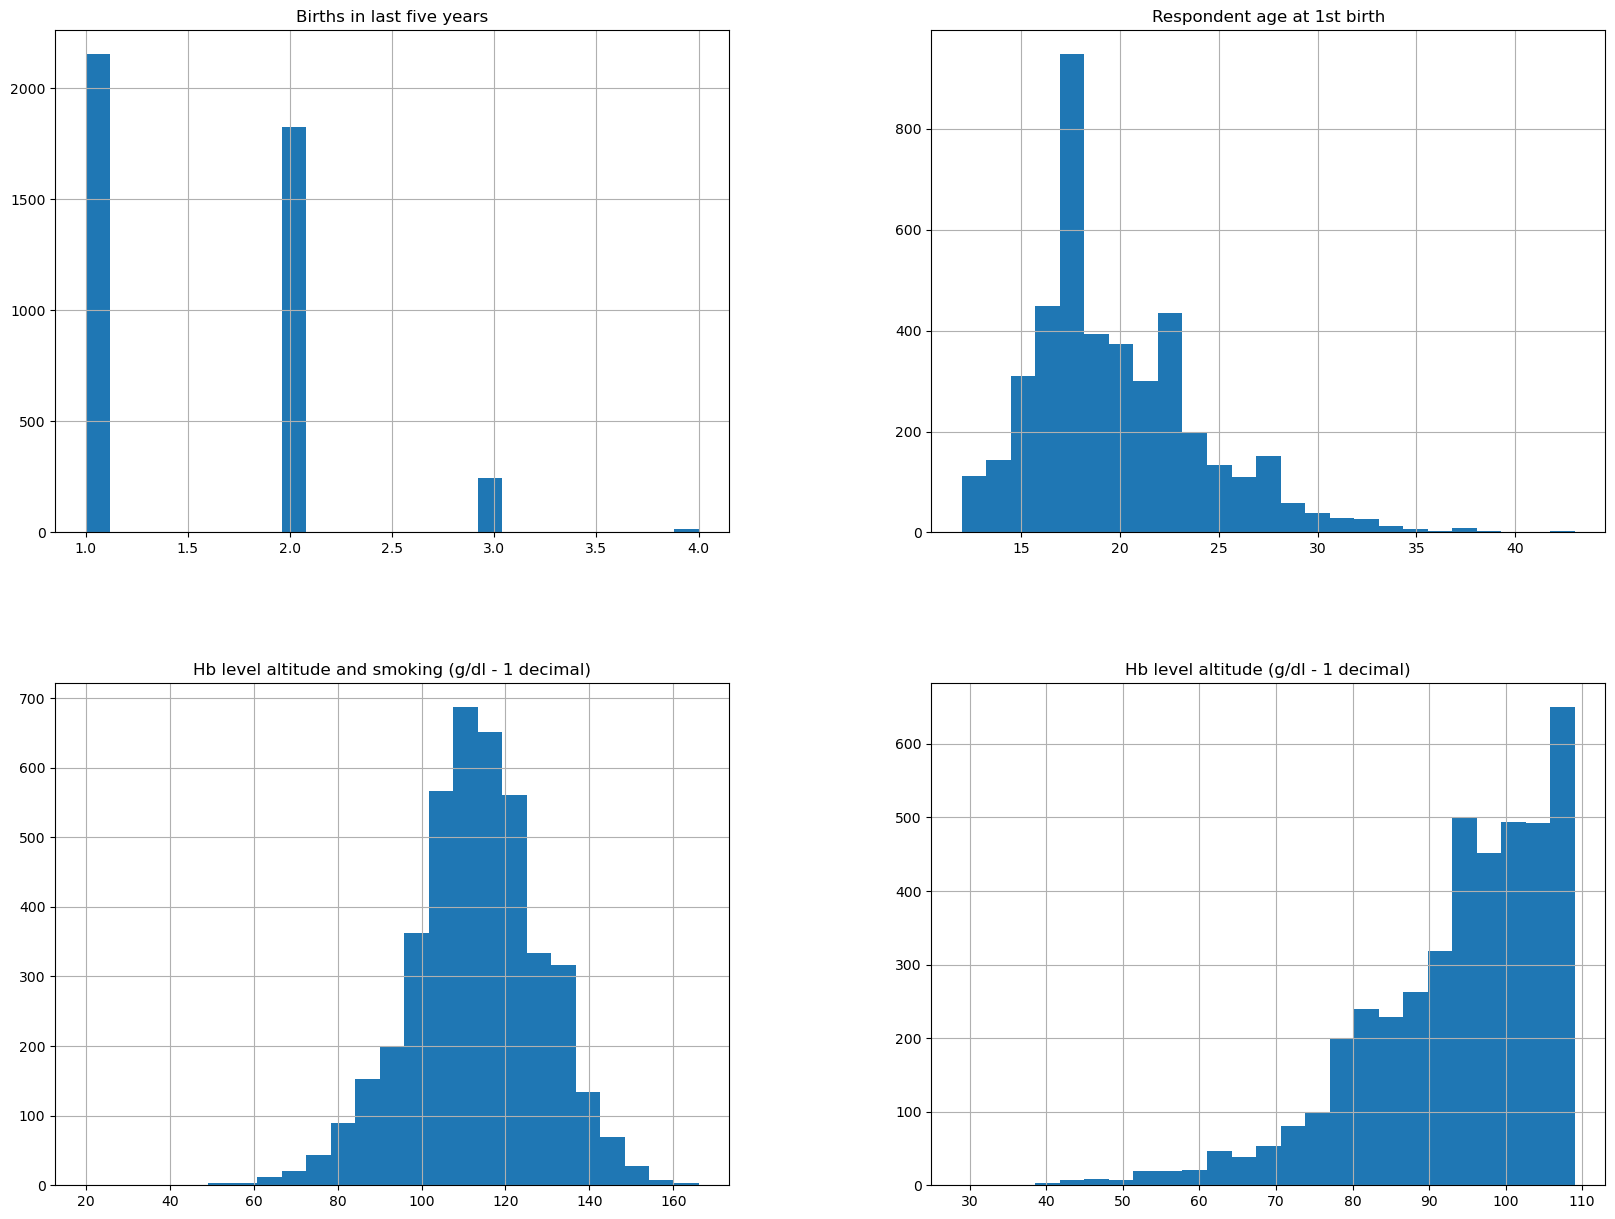

In [59]:
#plot a histogram for each numerical value
anemia.hist(bins=25, figsize=(20,15))
plt.show()

In [60]:
#create a test set using scikit
from sklearn.model_selection import train_test_split

In [61]:
train_set, test_set = train_test_split(anemia, test_size=0.2, random_state=42)

In [62]:
#stratified sampling based on age groups - you can do based on any column
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(anemia, anemia["Age in 5-year groups"]):
    strat_train_set = anemia.loc[train_index]
    strat_test_set = anemia.loc[test_index]
    

In [63]:
strat_test_set["Age in 5-year groups"].value_counts()/len(strat_test_set)

Age in 5-year groups
25-29    0.266196
30-34    0.221437
20-24    0.180212
35-39    0.179034
40-44    0.078916
15-19    0.043581
45-49    0.030624
Name: count, dtype: float64

In [64]:
#return data to original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Age in 5-year groups", axis=1, inplace=True)

In [65]:
#create a copy for visualization without interfering with the original set

anemia = strat_train_set.copy()

<Axes: xlabel='Births in last five years', ylabel='Hb level altitude (g/dl - 1 decimal)'>

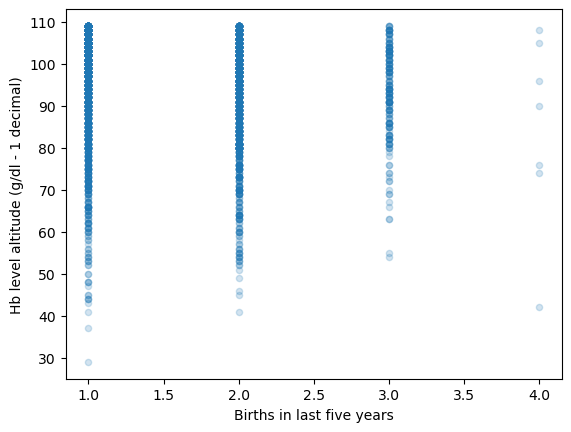

In [66]:
anemia.plot(kind="scatter", x='Births in last five years', y='Hb level altitude (g/dl - 1 decimal)', alpha=.2)

#underfitting error witnessed
#proper axes would be level of education vis a vis seeking treatment options, convert both to int type
#apply OneHotEncoder 

In [67]:
anemia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3393 entries, 3354 to 3552
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Residence                                         3393 non-null   object
 1   Literacy level                                    3393 non-null   object
 2   Wealth index                                      3393 non-null   object
 3   Births in last five years                         3393 non-null   int64 
 4   Respondent age at 1st birth                       3393 non-null   int64 
 5   Hb level altitude and smoking (g/dl - 1 decimal)  3393 non-null   int64 
 6   Mosquito net                                      3393 non-null   object
 7   Smokes                                            3393 non-null   object
 8   Fever in last two weeks                           3393 non-null   object
 9   Hb level altitude (g/dl - 1 deci

In [70]:
from sklearn.preprocessing import OneHotEncoder
anemia_cat = np.array(["Residence","Literacy level","Wealth index"," Anemia level","Mosquito net","Smokes"," Fever in last two weeks","Iron supplement"])
cat_encoder = OneHotEncoder()
anemia_cat_reshaped = anemia_cat.reshape(-1, 1) #single sample reshape as required by OneHotEncorder
anemia_cat_1hot = cat_encoder.fit_transform(anemia_cat_reshaped)
anemia_cat_1hot.toarray()

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [71]:
#getting the list of categories using the encoder's categories_ instance variable
cat_encoder.categories_

[array([' Anemia level', ' Fever in last two weeks', 'Iron supplement',
        'Literacy level', 'Mosquito net', 'Residence', 'Smokes',
        'Wealth index'], dtype='<U24')]

In [80]:
anemia = anemia.drop("Residence", axis=1)
#dropped the column since "rural" could not be converted to numerical value despite running OneHotEncoder,
# and neither does it add any real value to the data, considering wealth index is included

In [95]:
anemia_num = ['Births in last five years','Respondent age at 1st birth','Hb level altitude and smoking (g/dl - 1 decimal)','Hb level altitude (g/dl - 1 decimal)']


In [98]:
print("Column names in DataFrame 'anemia':", anemia.columns)
print("Numerical attributes:", anemia_num)
print("Categorical attributes:", cat_attribs)

Column names in DataFrame 'anemia': Index(['Literacy level', 'Wealth index', 'Births in last five years',
       'Respondent age at 1st birth',
       'Hb level altitude and smoking (g/dl - 1 decimal)', 'Mosquito net',
       'Smokes ', 'Fever in last two weeks',
       'Hb level altitude (g/dl - 1 decimal)', 'Anemia level',
       'Iron supplement'],
      dtype='object')
Numerical attributes: ['Births in last five years', 'Respondent age at 1st birth', 'Hb level altitude and smoking (g/dl - 1 decimal)', 'Hb level altitude (g/dl - 1 decimal)']
Categorical attributes: ['Anemia level', 'Fever in last two weeks', 'Iron supplement', 'Literacy level', 'Mosquito net', 'Smokes', 'Wealth index']


In [99]:
#apply transformation to all columns using ColumnTransformer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = list(anemia_num)

cat_attribs = ['Anemia level','Fever in last two weeks', 'Iron supplement', 'Literacy level', 'Mosquito net', 'Smokes', 'Wealth index']

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
anemia_prepared = full_pipeline.fit_transform(anemia)

ValueError: A given column is not a column of the dataframe

In [94]:
print("Column names in DataFrame 'anemia':", anemia.columns)
print("Numerical attributes:", anemia_num)
print("Categorical attributes:", cat_attribs)

Column names in DataFrame 'anemia': Index(['Literacy level', 'Wealth index', 'Births in last five years',
       'Respondent age at 1st birth',
       'Hb level altitude and smoking (g/dl - 1 decimal)', 'Mosquito net',
       'Smokes ', 'Fever in last two weeks',
       'Hb level altitude (g/dl - 1 decimal)', 'Anemia level',
       'Iron supplement'],
      dtype='object')
Numerical attributes: ['Births in last five years', 'Respondent age at 1st birth', 'Hb level altitude and smoking (g/dl - 1 decimal)', 'Hb level altitude (g/dl - 1 decimal)']
Categorical attributes: ['Anemia level', ' Fever in last two weeks', 'Iron supplement', 'Literacy level', 'Mosquito net', 'Smokes', 'Wealth index']
